In [55]:
import pandas as pd
import numpy as np

In [56]:
df = pd.read_csv('workout_fitness_tracker_data.csv')
df.head()

,User ID,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Water Intake (liters),Daily Calories Intake,Resting Heart Rate (bpm),VO2 Max,Body Fat (%),Mood Before Workout,Mood After Workout
0,1,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,1.9,3195,61,38.4,28.5,Tired,Fatigued
1,2,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,1.9,2541,73,38.4,28.5,Happy,Energized
2,3,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,1.9,3362,80,38.4,28.5,Happy,Fatigued
3,4,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,1.9,2071,65,38.4,28.5,Neutral,Neutral
4,5,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,1.9,3298,59,38.4,28.5,Stressed,Energized


Exploring the data

In [57]:
df.columns

Index(['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)',
       'Workout Type', 'Workout Duration (mins)', 'Calories Burned',
       'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)', 'Workout Intensity',
       'Sleep Hours', 'Water Intake (liters)', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)', 'VO2 Max', 'Body Fat (%)',
       'Mood Before Workout', 'Mood After Workout'],
      dtype='object')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   User ID                   10000 non-null  int64  
 1   Age                       10000 non-null  int64  
 2   Gender                    10000 non-null  object 
 3   Height (cm)               10000 non-null  int64  
 4   Weight (kg)               10000 non-null  int64  
 5   Workout Type              10000 non-null  object 
 6   Workout Duration (mins)   10000 non-null  int64  
 7   Calories Burned           10000 non-null  int64  
 8   Heart Rate (bpm)          10000 non-null  int64  
 9   Steps Taken               10000 non-null  int64  
 10  Distance (km)             10000 non-null  float64
 11  Workout Intensity         10000 non-null  object 
 12  Sleep Hours               10000 non-null  float64
 13  Water Intake (liters)     10000 non-null  float64
 14  Daily C

In [59]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,10000.0,5000.500000,2.886896e+03,1.0,2500.75,5000.50,7500.25,10000.0
Age,10000.0,38.390100,1.217164e+01,18.0,28.00,38.00,49.00,59.0
Height (cm),10000.0,174.275100,1.444099e+01,150.0,162.00,174.00,187.00,199.0
Weight (kg),10000.0,84.903000,2.018994e+01,50.0,67.00,85.00,102.00,119.0
Workout Duration (mins),10000.0,64.464800,3.181495e+01,10.0,37.00,64.00,92.00,119.0
Calories Burned,10000.0,552.100800,2.606299e+02,100.0,325.00,554.00,776.00,999.0
Heart Rate (bpm),10000.0,129.526700,2.887415e+01,80.0,105.00,130.00,155.00,179.0
Steps Taken,10000.0,10455.496600,5.486424e+03,1000.0,5673.00,10434.50,15211.00,19998.0
Distance (km),10000.0,7.820745,4.159148e+00,0.5,4.24,7.85,11.41,15.0
Sleep Hours,10000.0,6.982820,1.708738e+00,4.0,5.50,7.00,8.40,10.0


In [60]:
for col in df.select_dtypes(exclude= 'number').columns:
    print(f"{col}: {df[col].unique()}")

Gender: ['Male' 'Other' 'Female']
Workout Type: ['Cycling' 'Cardio' 'HIIT' 'Strength' 'Yoga' 'Running']
Workout Intensity: ['High' 'Medium' 'Low']
Mood Before Workout: ['Tired' 'Happy' 'Neutral' 'Stressed']
Mood After Workout: ['Fatigued' 'Energized' 'Neutral']


In [61]:
for col in df.select_dtypes(exclude= 'number').columns:
    print(f"{col}: {df[col].value_counts()} \n")
    print('-'*40)

Gender: Gender
Other     3392
Male      3370
Female    3238
Name: count, dtype: int64 

----------------------------------------
Workout Type: Workout Type
HIIT        1731
Strength    1667
Yoga        1666
Cycling     1656
Cardio      1645
Running     1635
Name: count, dtype: int64 

----------------------------------------
Workout Intensity: Workout Intensity
Low       3357
Medium    3323
High      3320
Name: count, dtype: int64 

----------------------------------------
Mood Before Workout: Mood Before Workout
Tired       2553
Happy       2511
Neutral     2511
Stressed    2425
Name: count, dtype: int64 

----------------------------------------
Mood After Workout: Mood After Workout
Neutral      3356
Energized    3323
Fatigued     3321
Name: count, dtype: int64 

----------------------------------------


In [62]:
df.isnull().sum()

User ID                     0
Age                         0
Gender                      0
Height (cm)                 0
Weight (kg)                 0
Workout Type                0
Workout Duration (mins)     0
Calories Burned             0
Heart Rate (bpm)            0
Steps Taken                 0
Distance (km)               0
Workout Intensity           0
Sleep Hours                 0
Water Intake (liters)       0
Daily Calories Intake       0
Resting Heart Rate (bpm)    0
VO2 Max                     0
Body Fat (%)                0
Mood Before Workout         0
Mood After Workout          0
dtype: int64

In [63]:
df.duplicated().sum()

0

**Preparing The data before splitting**

Encoding

In [64]:
gender_map = {'Male':0, 'Female': 1, 'Other': 2}

df['Gender'] = df['Gender'].map(gender_map)
df['Gender'].unique()

array([0, 2, 1], dtype=int64)

In [65]:
intensity_map = {'Low': 0, 'Medium': 1, 'High': 2}

df['Workout Intensity'] = df['Workout Intensity'].map(intensity_map)
df['Workout Intensity'].unique()

array([2, 1, 0], dtype=int64)

In [66]:
after_workout_map = {'Fatigued': 0, 'Neutral': 1, 'Energized': 2}

df['Mood After Workout'] = df['Mood After Workout'].map(after_workout_map)
df['Mood After Workout'].unique()

array([0, 2, 1], dtype=int64)

In [67]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output= False)

encoded = ['Mood Before Workout', 'Workout Type']
encodedArr = encoder.fit_transform(df[encoded])

# Convert to DataFrame with proper column names
encoded_df = pd.DataFrame(encodedArr, columns=encoder.get_feature_names_out(encoded))

# Concatenate the encoded columns with the original DataFrame (excluding the originals)
df = pd.concat([df.drop(columns=encoded), encoded_df], axis=1)

Check the skewness and data representation

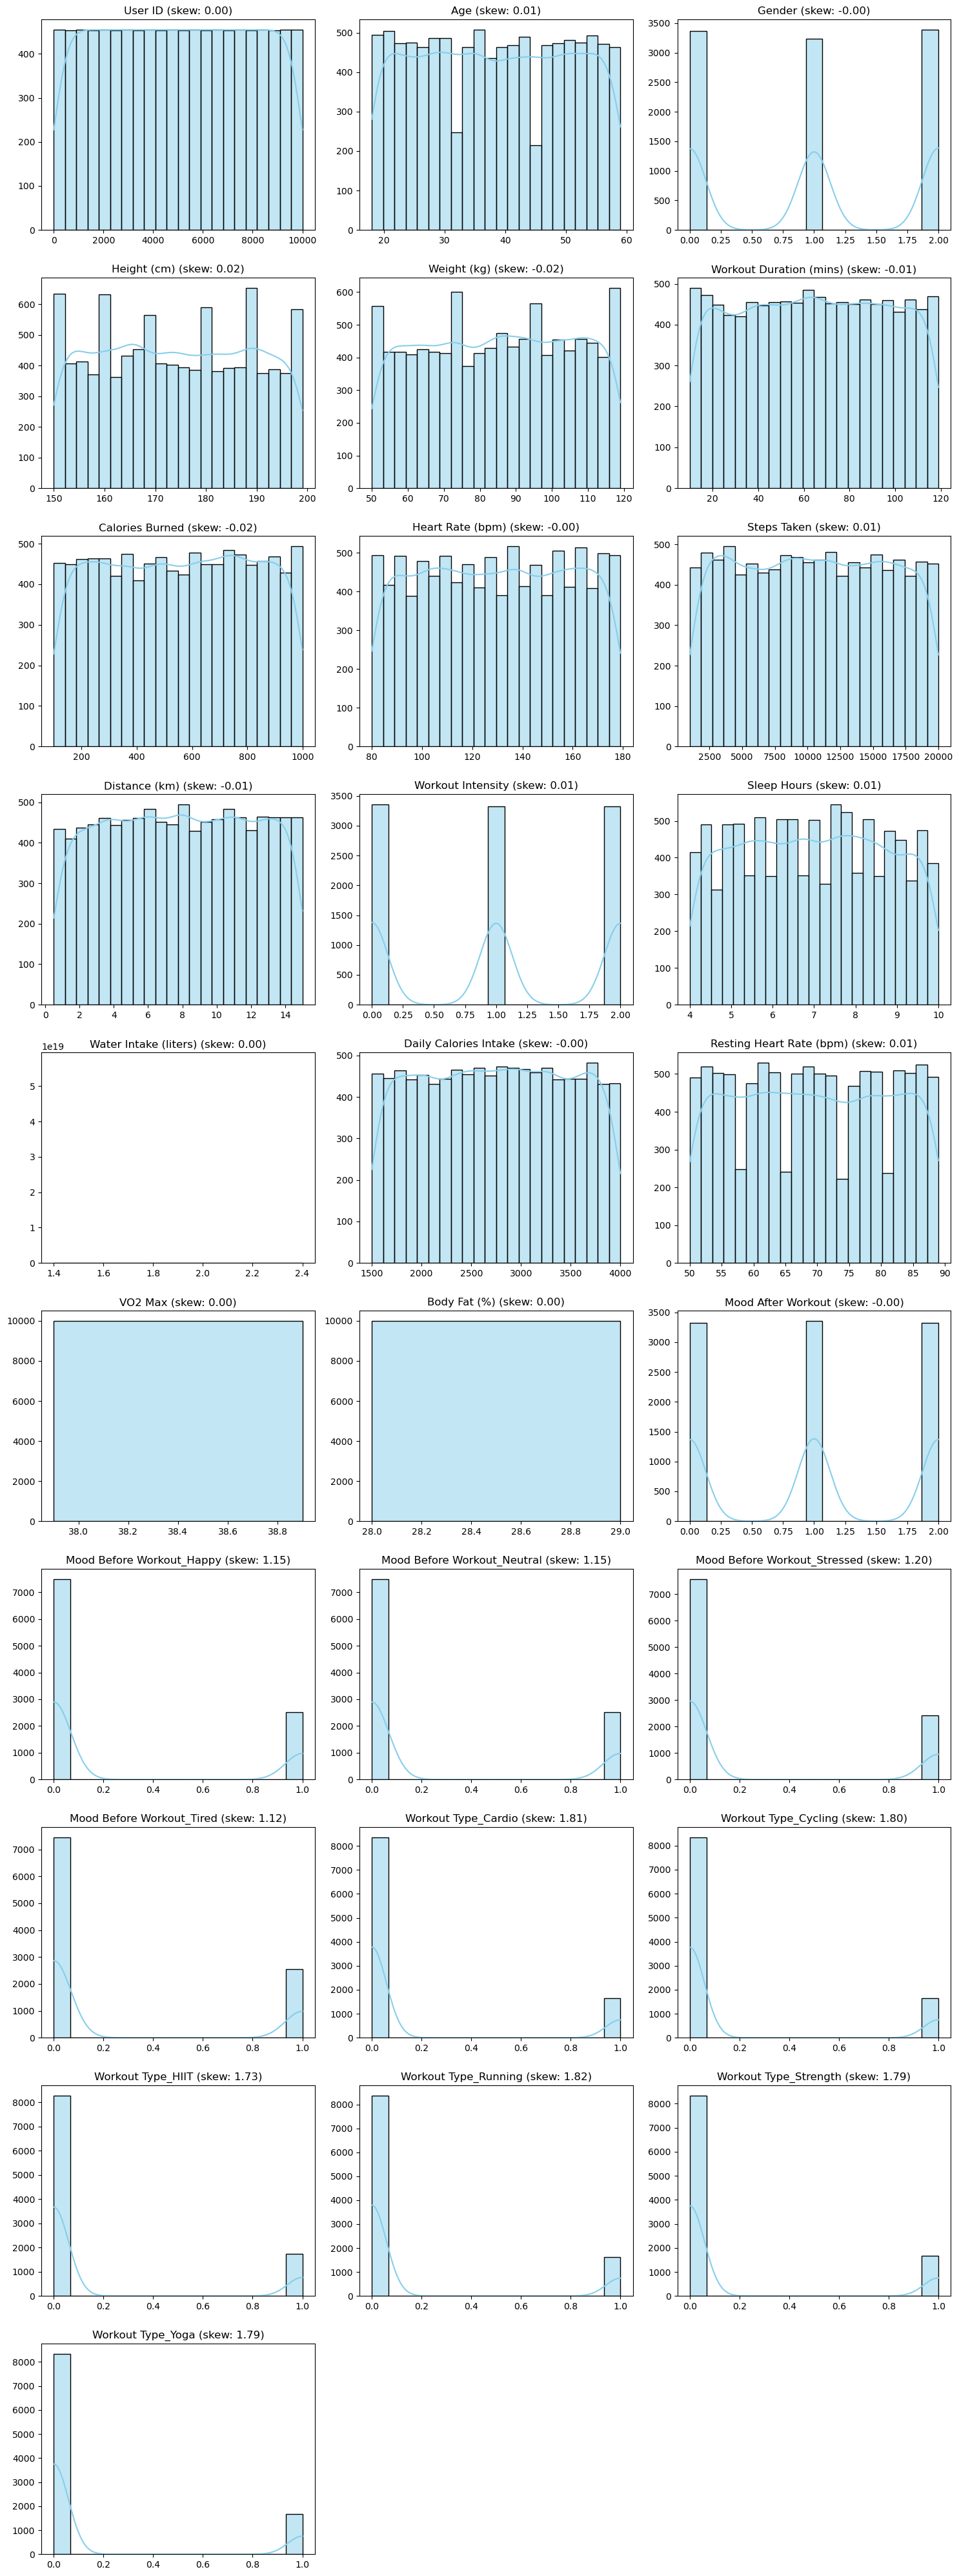

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import math


numeric_cols = df.select_dtypes(include='number').columns
num_plots = len(numeric_cols)
cols = 3
rows = math.ceil(num_plots / cols)

plt.figure(figsize=(15, rows * 4))

for i, column in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f"{column} (skew: {df[column].skew():.2f})")
    plt.xlabel("")
    plt.ylabel("")

plt.tight_layout()
plt.show()

In [69]:
for col in ['Body Fat (%)', 'VO2 Max']:
    print(f"{col}: {df[col].unique()}")

Body Fat (%): [28.5]
VO2 Max: [38.4]


Dropping Two columns ['Body Fat (%)', 'VO2 Max']

In [70]:
df = df.drop(['Body Fat (%)', 'VO2 Max'], axis=1)
df.columns

Index(['User ID', 'Age', 'Gender', 'Height (cm)', 'Weight (kg)',
       'Workout Duration (mins)', 'Calories Burned', 'Heart Rate (bpm)',
       'Steps Taken', 'Distance (km)', 'Workout Intensity', 'Sleep Hours',
       'Water Intake (liters)', 'Daily Calories Intake',
       'Resting Heart Rate (bpm)', 'Mood After Workout',
       'Mood Before Workout_Happy', 'Mood Before Workout_Neutral',
       'Mood Before Workout_Stressed', 'Mood Before Workout_Tired',
       'Workout Type_Cardio', 'Workout Type_Cycling', 'Workout Type_HIIT',
       'Workout Type_Running', 'Workout Type_Strength', 'Workout Type_Yoga'],
      dtype='object')

Check outliers

In [72]:
threshold = 1.5

for column in df.columns:
    
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify outliers
    outliers = df[(df[column] < Q1 - threshold * IQR) | (df[column] > Q3 + threshold * IQR)][column]

    # Print only if there are outliers
    if not outliers.empty:
        print(f"Outliers in column '{column}' ({len(outliers)} values):")
        # print(outliers.to_string())
        # print('-' * 40)

Outliers in column 'Mood Before Workout_Stressed' (2425 values):
Outliers in column 'Workout Type_Cardio' (1645 values):
Outliers in column 'Workout Type_Cycling' (1656 values):
Outliers in column 'Workout Type_HIIT' (1731 values):
Outliers in column 'Workout Type_Running' (1635 values):
Outliers in column 'Workout Type_Strength' (1667 values):
Outliers in column 'Workout Type_Yoga' (1666 values):


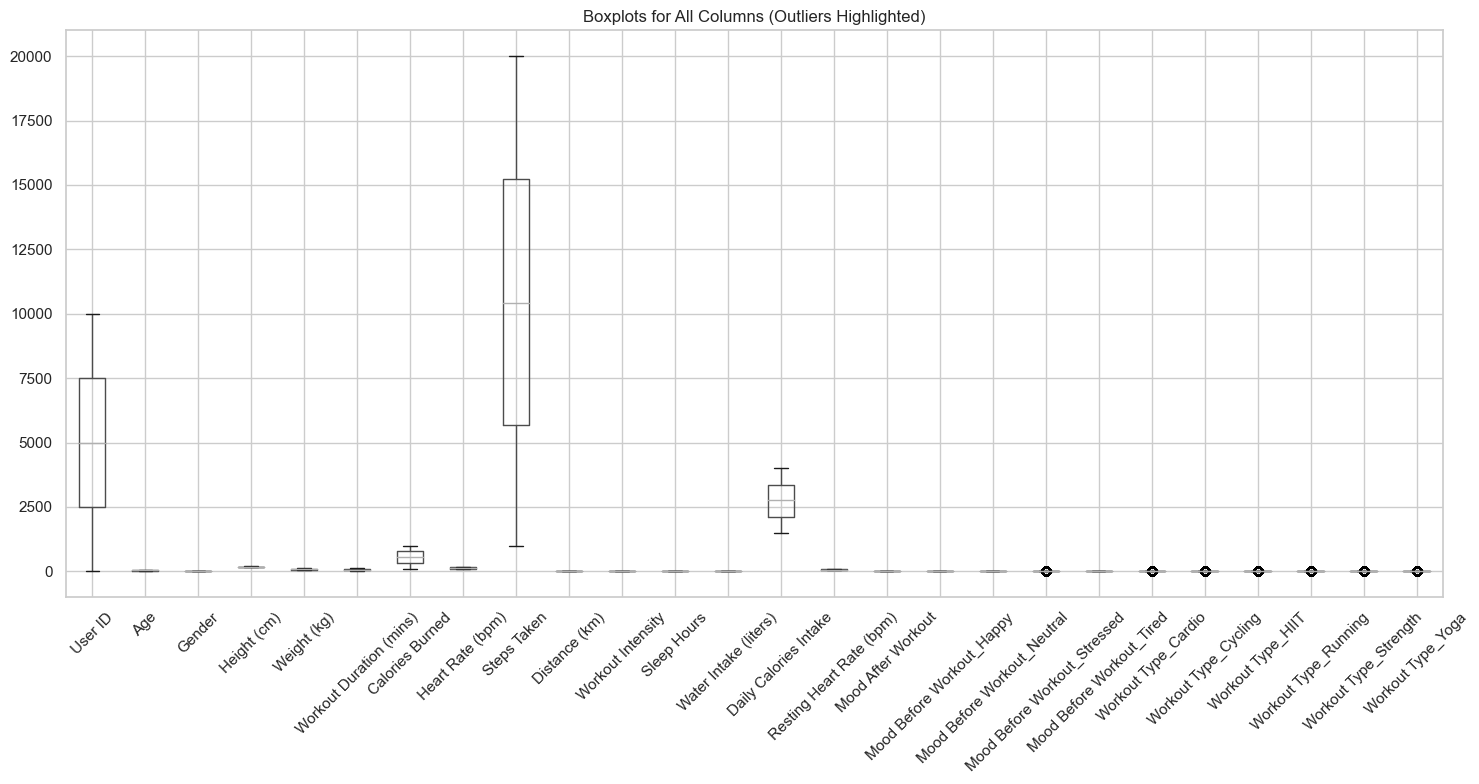

In [73]:
# Set a consistent style
sns.set_theme(style="whitegrid")

# Create subplots
plt.figure(figsize=(15, 8))
df.boxplot()
plt.title("Boxplots for All Columns (Outliers Highlighted)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Correlation analysis**

In [77]:
# corr = df.corr()
# print(corr)

**Scalling**

Save Preprocessing file

In [79]:
preprocessed_df = df.to_csv('Cleaned_Data.csv', index=False) 